## FIFA18 Dataset Visualization

This is a dataset with information about 15,000 players from the FIFA18 football simulator. You can familiarize yourself with it and download it from the link from [Kaggle](https://www.kaggle.com/thec03u5/fifa-18-demo-player-dataset/download), a platform for machine learning competitions.

To complete this task, you will need to do at least 4 visualizations for the specified dataset. I choose next visualization options:

+ Histogram of players age.
+ Compare the positions of players with their value.
+ Number of players from different countries.
+ Represent histogram with highest total value of players.

As usually we'll start with some data analysis and visualization imports.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")
%matplotlib inline

In [7]:
#Reading the dataset
df = pd.read_csv('CompleteDataset.csv')

#Let's look what we've got here
print(df.columns)

Index(['Unnamed: 0', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Acceleration', 'Aggression', 'Agility', 'Balance', 'Ball control',
       'Composure', 'Crossing', 'Curve', 'Dribbling', 'Finishing',
       'Free kick accuracy', 'GK diving', 'GK handling', 'GK kicking',
       'GK positioning', 'GK reflexes', 'Heading accuracy', 'Interceptions',
       'Jumping', 'Long passing', 'Long shots', 'Marking', 'Penalties',
       'Positioning', 'Reactions', 'Short passing', 'Shot power',
       'Sliding tackle', 'Sprint speed', 'Stamina', 'Standing tackle',
       'Strength', 'Vision', 'Volleys', 'CAM', 'CB', 'CDM', 'CF', 'CM', 'ID',
       'LAM', 'LB', 'LCB', 'LCM', 'LDM', 'LF', 'LM', 'LS', 'LW', 'LWB',
       'Preferred Positions', 'RAM', 'RB', 'RCB', 'RCM', 'RDM', 'RF', 'RM',
       'RS', 'RW', 'RWB', 'ST'],
      dtype='object')


We can see that there are a lot of coolumns for us to play with. Let's pick a smaller set of columns to get started.

In [25]:
players = df[[
    "Name", 
    "Age",
    "Nationality",
    "Overall",
    "Potential",
    "Club",
    "Value",
    "Wage",
    "Preferred Positions"
]]

columnsRequired = [
    "Name", 
    "Age",
    "Nationality",
    "Overall",
    "Potential",
    "Club",
    "Value",
    "Wage",
    "Preferred Positions"
]
players = df[columnsRequired]

In [26]:
#The original DataFrame has a lot of columns
print(df.shape)

(17981, 75)


In [27]:
#Our simplified DataFrame
print(players.shape)

(17981, 9)


In [28]:
players.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Positions
0,Cristiano Ronaldo,32,Portugal,94,94,Real Madrid CF,€95.5M,€565K,ST LW
1,L. Messi,30,Argentina,93,93,FC Barcelona,€105M,€565K,RW
2,Neymar,25,Brazil,92,94,Paris Saint-Germain,€123M,€280K,LW
3,L. Suárez,30,Uruguay,92,92,FC Barcelona,€97M,€510K,ST
4,M. Neuer,31,Germany,92,92,FC Bayern Munich,€61M,€230K,GK


In [29]:
#The final check of the dataset for comleteness
players.isnull().sum()

Name                     0
Age                      0
Nationality              0
Overall                  0
Potential                0
Club                   248
Value                    0
Wage                     0
Preferred Positions      0
dtype: int64

Seems there are 248 free agents in the market.

### Histogram of players age.

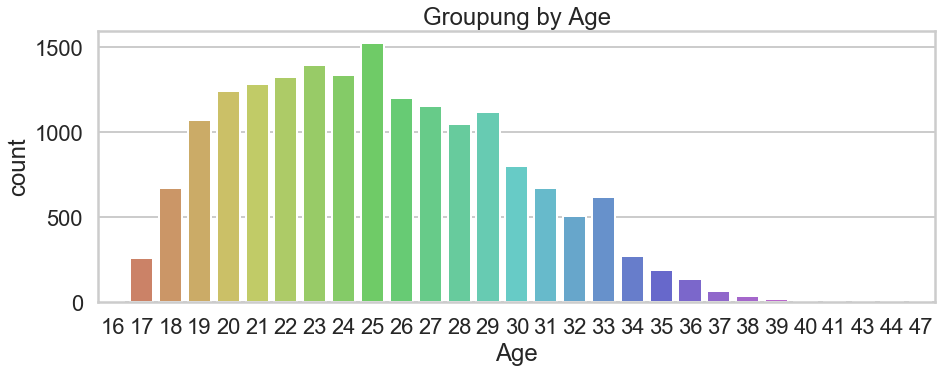

In [30]:
plt.figure(figsize=(15, 5))
plt.title('Groupung by Age')
plt.xlabel('Age')
sns.countplot(x='Age', data=df, palette='hls')

This is the typical aging curve of a top-level football players.

### Compare the positions of players with their value.

Every player has a preferred position. In the Preferred Position column, we can clearly see the presence of two positions. Let us assume that the player prefers the first position while the second position is the alternative position. To make our task easier we can seperate the 'Preferred Position' into:

**Actual_Position** - The first position.

**Position_Numbers** - Total number of positions present in Preferred Position.

In [48]:
players['Actual_Position'] = players['Preferred Positions'].str.split().str[0]
players['Position_Numbers'] = players['Preferred Positions'].apply(lambda x: len(x.split()))
players['Position_Numbers'].unique()

c:\users\user\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
c:\users\user\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


array([2, 1, 3, 4], dtype=int64)

In [49]:
players.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Positions,Actual_Position,Position_Numbers
0,Cristiano Ronaldo,32,Portugal,94,94,Real Madrid CF,€95.5M,€565K,ST LW,ST,2
1,L. Messi,30,Argentina,93,93,FC Barcelona,€105M,€565K,RW,RW,1
2,Neymar,25,Brazil,92,94,Paris Saint-Germain,€123M,€280K,LW,LW,1
3,L. Suárez,30,Uruguay,92,92,FC Barcelona,€97M,€510K,ST,ST,1
4,M. Neuer,31,Germany,92,92,FC Bayern Munich,€61M,€230K,GK,GK,1


We need to change the format of the few fields into float in order to ease the visualisation of the data: Wage & Value

In [55]:
def convert(amount):
    if amount[-1] == 'M':
        return float(amount[1:-1])*1000000
    elif amount[-1] == 'K':
        return float(amount[1:-1])*1000
    else :
        return float(amount[1:])
players['Value'] = players['Value'].apply(lambda x: convert(x))
players['Wage'] = players['Wage'].apply(lambda x: convert(x))

c:\users\user\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\users\user\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


We can also compute mean for both wage and values so as to have a better understanding of players and their potential/value. We categorise players having wage and value higher than mean by 1 otherwise 0.

In [57]:
mean_wage = players['Wage'].mean()
mean_value = players['Value'].mean()

def mean(x,avg):
    if(x > avg):
        return 1;
    else:
        return 0;
players['ValuePosition'] = players['Value'].apply(lambda x: mean(x,mean_wage))
players['WagePosition'] = players['Wage'].apply(lambda x: mean(x,mean_wage))

c:\users\user\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
c:\users\user\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [58]:
player_pos = players.groupby('Actual_Position').mean().reset_index()[['Actual_Position','Value']].sort_values('Value', ascending = False)
player_pos['Value'] = player_pos['Value'].apply(lambda x: x/1000000).values.tolist()

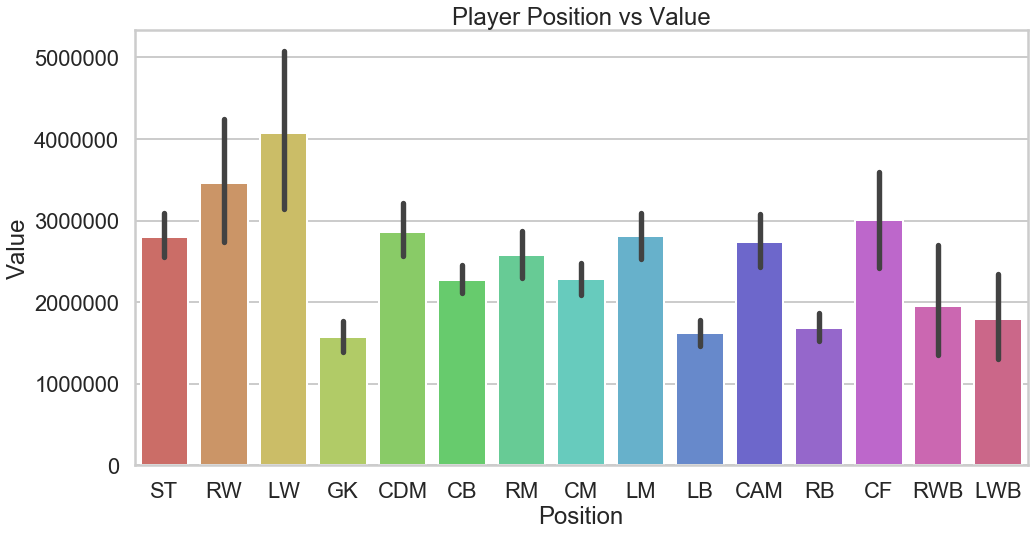

In [60]:
plt.figure(figsize=(16,8))
plt.title('Player Position vs Value')
b = sns.barplot(x='Actual_Position', y='Value',data= players, palette='hls')
plt.xlabel("Position", )
plt.ylabel('Value')
plt.show()

### Number of players from different countries.

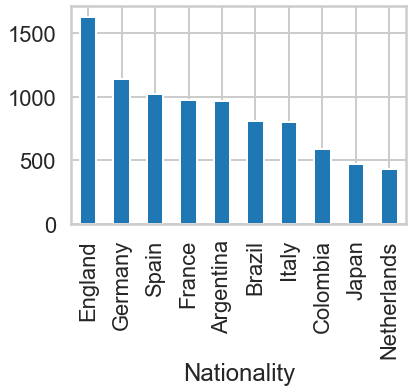

In [62]:
players.groupby("Nationality").Name.count().sort_values(ascending=False).head(10).plot(kind="bar")

### Represent histogram with highest total value of players.

In [63]:
value_club = players.groupby("Club").sum().sort_values('Value', ascending=False).head(20).reset_index()[['Club', 'Value']]
value_club['Value'] = value_club['Value'].apply(lambda x: x/1000000).values.tolist()
value_club

,Club,Value
0,Real Madrid CF,826.700
1,FC Bayern Munich,748.825
2,FC Barcelona,744.500
3,Chelsea,673.085
4,Paris Saint-Germain,631.750
5,Manchester United,625.300
6,Juventus,617.100
7,Manchester City,578.215
8,Atlético Madrid,566.150
9,Tottenham Hotspur,516.955


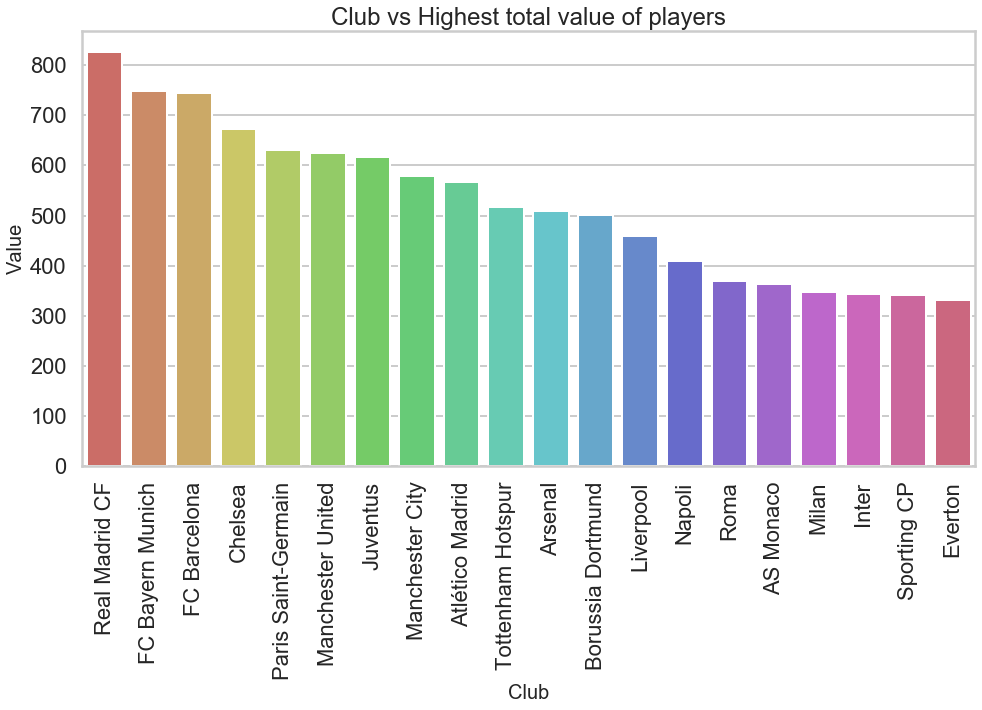

In [64]:
plt.figure(figsize=(16,8))
plt.title('Club vs Highest total value of players')
b = sns.barplot(x='Club', y='Value', data= value_club, palette="hls")
plt.xticks(rotation=90)
plt.xlabel("Club", fontsize=20)
plt.ylabel('Value', fontsize=20)
plt.show()